#### The dataset is in the following directory structure

- `train/<class>/<image-name>.jpg`
- `test/<class>/<image-name>.jpg`

In [1]:
import os
kaggle_data={"username":"avantidasre","key":"a5d86f6dae2cc44ba9797151b4d9f6ee""}
os.environ['KAGGLE_USERNAME']=kaggle_data["username"]
os.environ['KAGGLE_KEY']=kaggle_data["key"]

In [2]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

100% 105M/105M [00:01<00:00, 123MB/s]  
100% 105M/105M [00:01<00:00, 96.5MB/s]


In [3]:
!unzip cifake-real-and-ai-generated-synthetic-images.zip -d cifake-real-and-ai-generated-synthetic-images

Streaming output truncated to the last 5000 lines.
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (10).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (2).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (3).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (4).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (5).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (6).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (7).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (8).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500 (9).jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4500.jpg  
  inflating: cifake-real-and-ai-generated-synthetic-images/train/REAL/4501 (10).jpg  
  inflating: cif

In [4]:
import numpy as np
import pandas as pd
import os

train_dir = "cifake-real-and-ai-generated-synthetic-images/train"
test_dir = "cifake-real-and-ai-generated-synthetic-images/test"

This code defines a function to gather image details (name, label, path) from the specified directories, constructs a DataFrame to organize this information, and prints a summary of the total number of images found. However, there's a discrepancy in the usage of folder in the function, which is not utilized within the function body:

In [5]:
def get_image_details(folder):

    data = []
    classes = os.listdir(train_dir)
    for class_name in classes:
        class_dir = os.path.join(train_dir, class_name)
        images = os.listdir(class_dir)
        for img in images:
            img_path = f"{class_dir}/{img}"
            data.append([img, class_name, img_path])

    data_df = pd.DataFrame(data, columns=['image_name', 'label', 'image_path'])
    print(f"{len(data_df)} total images found..." )

    return data_df

This function takes a DataFrame containing image details, selects a random subset of images, and displays them in a grid with their corresponding class labels for visualization. It's a useful utility to quickly visualize a set of sample images from the dataset :

In [6]:
import matplotlib.pyplot as plt
def show_sample_images(df):

    n_samples = 15
    sample_df = df.sample(n_samples)

    img_paths = sample_df['image_path'].values
    img_classes = sample_df['label'].values

    plt.figure(figsize= (4,4))
    for i in range(0, n_samples):
        # create a subplot grid
        plt.subplot(3, 5, i + 1)
        img = plt.imread(img_paths[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_classes[i])

    plt.show()

#### Training Data  

The function show_sample_images(train_data) uses matplotlib to display a grid of sample images. It randomly selects a subset of images from the training dataset and displays them in a grid, along with their corresponding class labels. This is helpful for a quick visual inspection of the dataset.

The code fetches image details, displays a sample of the data, provides class distribution information, and visualizes sample images from the training dataset.

In [7]:
train_data = get_image_details(train_dir)
train_data[['image_name', 'label']].head()

100000 total images found...


,image_name,label
0,3747 (9).jpg,FAKE
1,1817 (5).jpg,FAKE
2,5205 (4).jpg,FAKE
3,5329 (10).jpg,FAKE
4,5622 (9).jpg,FAKE


In [8]:
train_data['label'].value_counts()

FAKE    50000
REAL    50000
Name: label, dtype: int64

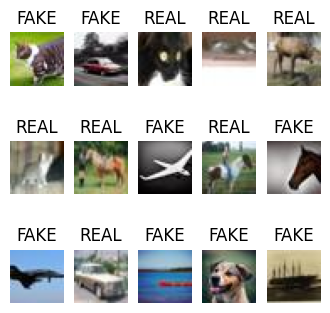

In [9]:
show_sample_images(train_data)

#### Test data

The purpose of these steps is similar to what was explained for the training dataset but is now applied to the test dataset. It involves organizing and visualizing the test dataset for further analysis and model evaluation.

In [10]:
test_data = get_image_details(test_dir)

100000 total images found...


In [11]:
test_data['label'].value_counts()

FAKE    50000
REAL    50000
Name: label, dtype: int64

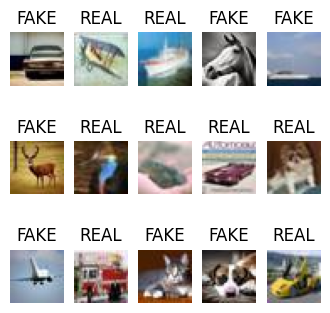

In [12]:
show_sample_images(test_data)

Data Preparation  

code reads image data from the "REAL" and "FAKE" directories, labels them accordingly, and stores the image arrays and labels in X_train and y_train, respectively. It's a crucial step in preparing the data for training a machine learning model.

In [13]:
import cv2
X_train = []
y_train = []
for img in os.listdir('/content/cifake-real-and-ai-generated-synthetic-images/train/REAL'):
  X_train.append(cv2.imread(f'/content/cifake-real-and-ai-generated-synthetic-images/train/REAL/{img}'))
  y_train.append(1)

for img in os.listdir('/content/cifake-real-and-ai-generated-synthetic-images/train/FAKE'):
  X_train.append(cv2.imread(f'/content/cifake-real-and-ai-generated-synthetic-images/train/FAKE/{img}'))
  y_train.append(0)

In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [16]:
X_train.shape

(100000, 32, 32, 3)

Model Building

Below code defines a utility function plot_history to visualize the training and validation accuracy of a neural network during training. It's a helpful tool for monitoring the performance of the model over epochs and identifying any overfitting or underfitting.

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [18]:
from matplotlib import pyplot as plt
def plot_history(history):
  y = history.history['accuracy']
  x = list(range(1,len(y)+1))
  plt.plot(x,y)
  y = history.history['val_accuracy']
  x = list(range(1,len(y)+1))
  plt.plot(x,y)
  plt.show()

Architecture 1

code defines, compiles, trains, and saves a neural network model for binary classification. It also visualizes the training and validation accuracy for monitoring the model's performance during training.

In [ ]:
def make_model_1(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation= "sigmoid")(x)
    return keras.Model(inputs, outputs)

In [ ]:
model = make_model_1(X_train.shape[1:],2)
model.compile(optimizer='adam',loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,y_train,
    epochs=50,
    validation_split=0.3
)


In [ ]:
model.save('model1.keras')

In [ ]:
plot_history(history)

Prediction archi1:This is the smallest used model among the three models, It trained very fast and was able to achieve a pretty good accuracy


Architecture 2

This code defines, compiles, trains, and plots a neural network model for binary classification. It also displays the training progress for the initial epochs, showing how the loss and accuracy evolve during training.

In [21]:
def make_model_2(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    x = layers.Activation("relu")(x)
    x = layers.Conv2D(256, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(128, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(16, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation= "sigmoid")(x)
    return keras.Model(inputs, outputs)

In [22]:
model = make_model_2(X_train.shape[1:],2)
model.compile(optimizer='adam',loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,y_train,
    epochs=50,
    validation_split=0.2
)
plot_history(history)

Epoch 1/50
2500/2500 [==============================] - 1285s 513ms/step - loss: 0.3775 - accuracy: 0.8316 - val_loss: 0.2308 - val_accuracy: 0.9109
Epoch 2/50
2500/2500 [==============================] - 1264s 506ms/step - loss: 0.2877 - accuracy: 0.8820 - val_loss: 0.3703 - val_accuracy: 0.8206
Epoch 3/50
1146/2500 [============>.................] - ETA: 11:06 - loss: 0.2639 - accuracy: 0.8914

KeyboardInterrupt: ignored

The second model is comparatively big with mode layers of convolution. While the bigger models can perform slightly better, it took a lot of time and resources to train this model



reset ( Architecture 3) 

It demonstrates transfer learning using a pre-trained ResNet50 model, modifying the model by adding layers, freezing pre-trained layers, compiling the model, and training it on a new dataset. The training progress and accuracy are visualized using the plot_history function.

In [27]:
imported_model= tf.keras.applications.ResNet50(include_top=False,
input_shape=X_train.shape[1:],
pooling='avg',classes=1,
weights='imagenet')
for layer in imported_model.layers:
  layer.trainable=False

94765736/94765736 [==============================] - 0s 0us/step


In [31]:
resnet = models.Sequential()
resnet.add(imported_model)
resnet.add(layers.Flatten())
resnet.add(layers.Dense(512, activation='relu'))
resnet.add(layers.Dense(32, activation='relu'))
resnet.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
resnet.compile(optimizer='adam',loss="binary_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,y_train,
    epochs=50,
    validation_split=0.2
)

plot_history(history)



Epoch 1/50
2500/2500 [==============================] - 1388s 555ms/step - loss: 0.2486 - accuracy: 0.9016 - val_loss: 1.8369 - val_accuracy: 0.4004
Epoch 2/50
2500/2500 [==============================] - 1270s 508ms/step - loss: 0.2331 - accuracy: 0.9076 - val_loss: 0.3541 - val_accuracy: 0.8504
Epoch 3/50
1321/2500 [==============>...............] - ETA: 9:27 - loss: 0.2215 - accuracy: 0.9126

This model is created using pretrained resnet. The last layer of resnet is removed, new layers are added. The already existing layers of resnet are frozen and the weights of those layers will not be effected during training. Then the added layers are trained while being attached to the pretrained layers. This has reduced the training time of the model many folds and improved the performance very much.
